Download Dataset


In [ ]:
! kaggle datasets download -d alessandrasala79/ai-vs-human-generated-dataset

Dataset URL: https://www.kaggle.com/datasets/alessandrasala79/ai-vs-human-generated-dataset
License(s): apache-2.0
100% 9.75G/9.76G [01:01<00:00, 119MB/s]
100% 9.76G/9.76G [01:01<00:00, 170MB/s]


In [ ]:
! unzip '/content/ai-vs-human-generated-dataset.zip' -d '/content/drive'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/train_data/efd938a800124cf69ec656cd2d518fa5.jpg  
  inflating: /content/drive/train_data/efd97dc6cf2d44b4b635b20415c516c1.jpg  
  inflating: /content/drive/train_data/efd9d70912ee498485cabe62c2a9943e.jpg  
  inflating: /content/drive/train_data/efd9facc4ca04695ad2710f43a33219d.jpg  
  inflating: /content/drive/train_data/efda2fdd29ae4c19ac1ecf6c1a83166b.jpg  
  inflating: /content/drive/train_data/efdc29bae2ba4847aa23f5549ce3e89b.jpg  
  inflating: /content/drive/train_data/efdcd2eab54d4c6f87b6cb25dbaf139a.jpg  
  inflating: /content/drive/train_data/efdceffbac1e445e987ac4e06d8775ec.jpg  
  inflating: /content/drive/train_data/efde74f673c341e09ab5184fe29759da.jpg  
  inflating: /content/drive/train_data/efdf66dfcf4d4e53b7fc9b55cd563d0d.jpg  
  inflating: /content/drive/train_data/efdfd51607ed4ff8ad14ffeeb798f977.jpg  
  inflating: /content/drive/train_data/efe1570296ed40e39d5fc5bb77105920.jpg  
  inflating: 

## CSV to Dataframe




In [ ]:
import pandas as pd
import os

def csvToDataframe(csv_path: str) -> pd.DataFrame:
    """
    Return a panda dataframe from a CSV file path. Print errors if reading is unsuccessful.

    Parameters:
    csv path (str): File path of a CSV file.

    Returns:
    df - Panda Dataframe containing CSV file
    """

    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        df = pd.DataFrame()  # To not break the following code

    return df

def displayCsv(csv_path: str) -> None:
    """
    Display the name and shape of the CSV file.
    Display the labels and first rows of CSV file.

    Parameters:
    csv path (str): File path of a CSV file.

    Returns:
    None - prints file name, shape, labels and sample rows.

    """

    df = csvToDataframe(csv_path)
    file_name = os.path.basename(csv_path)
    print(f"\n{file_name} has shape: {df.shape}")
    display(df.head())


### Display Dataframe

In [ ]:

train_csv = ("/content/drive/train.csv")
test_csv = ("/content/drive/test.csv")
df_train = csvToDataframe(train_csv)    # save panda dataframe
df_test = csvToDataframe(test_csv)    # save panda dataframe
displayCsv(train_csv)
displayCsv(test_csv)




train.csv has shape: (79950, 3)


Unnamed: 0                                        file_name  label
0           0  train_data/a6dcb93f596a43249135678dfcfc17ea.jpg      1
1           1  train_data/041be3153810433ab146bc97d5af505c.jpg      0
2           2  train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg      1
3           3  train_data/8542fe161d9147be8e835e50c0de39cd.jpg      0
4           4  train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg      1


test.csv has shape: (5540, 1)


id
0  test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1  test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2  test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3  test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4  test_data_v2/a16495c578b7494683805484ca27cf9f.jpg

## 2.3 Understand Input Images

### Create dictionary of img file-label pairs

In [ ]:
# Create a dictionary of img path - label pairs
train_dict = dict(zip(df_train["file_name"], df_train["label"]))


### Display ordered images with labels

In [ ]:
img_paths = list(train_dict.keys())
img_labels = list(train_dict.values())

print(f"First 2 filepaths: \n {img_paths[:2]}")
print(f"First 2 labels: \n {img_labels[:2]}")

First 2 filepaths: 
 ['train_data/a6dcb93f596a43249135678dfcfc17ea.jpg', 'train_data/041be3153810433ab146bc97d5af505c.jpg']
First 2 labels: 
 [1, 0]


# 3 Preprocess Data

## 3.1 Split into Training and Validation datasets

### Define Training-Validation Split
Here we will do a typical 80-20 training-validation split.

There will be the caveat that we will pair rows (so AI-Human combinations) remain in the same split to hopefully improve our validation accuracy.

In [ ]:
import random

# Constants
TRAIN_SPLIT = 0.8
VALID_SPLIT = 0.2
SEED = 42    # For reproducibility

# Create labeled list of images
labeled_img_files = [list(pair) for pair in zip(df_train["file_name"], df_train["label"])]
print(f"First 2 pairs: \n {labeled_img_files[:2]}")

First 2 pairs: 
 [['train_data/a6dcb93f596a43249135678dfcfc17ea.jpg', 1], ['train_data/041be3153810433ab146bc97d5af505c.jpg', 0]]


### Create Labeled Train-Valid Directories

In [ ]:
# Build directories for organizing train-valid data
# 0 label - Human
# 1 label - AI

directories = [
    "/content/drive/ai-vs-human",
    "/content/drive/ai-vs-human/dataset",
    "/content/drive/ai-vs-human/dataset/train",
    "/content/drive/ai-vs-human/dataset/valid",
    "/content/drive/ai-vs-human/dataset/train/0",
    "/content/drive/ai-vs-human/dataset/train/1",
    "/content/drive/ai-vs-human/dataset/valid/0",
    "/content/drive/ai-vs-human/dataset/valid/1"
]

# Create directories from list
for directory in directories:
    os.makedirs(directory, exist_ok=True)

### Group Training Set into AI-Human pairs

In [ ]:
# 1st image - AI (1), 2nd image - Human (0), and so on
img_pair_paths = []    # Target structure of labels -> [[1,0], [1,0], [1,0]...]
for i in range(0, len(img_paths), 2):
  img_pair_paths.append([img_paths[i], img_paths[i+1]])


### Shuffle Training/Valid Pairs

In [ ]:
import shutil
import numpy as np


data_dir = "/content/drive"
output_dir = "/content/drive/ai-vs-human/dataset"
train_ratio = 0.8
np.random.seed(SEED)
random.seed(SEED)

# Create new shuffled paired list
shuffled_pair_paths = random.sample(img_pair_paths, len(img_pair_paths))

indeces_train = int(len(shuffled_pair_paths) * train_ratio)
train_pairs = shuffled_pair_paths[:indeces_train]
valid_pairs = shuffled_pair_paths[indeces_train:]


In [ ]:
# Function to copy files
def copy_files(pairs, target_folder):
  count = 0
  for ai_img, human_img in pairs:
    shutil.copy(os.path.join(data_dir, ai_img), os.path.join(output_dir, target_folder, "1", os.path.basename(ai_img)))
    shutil.copy(os.path.join(data_dir,human_img), os.path.join(output_dir, target_folder, "0", os.path.basename(human_img)))

    # Monitor Progress
    count += 1
    if count % 1000 == 0:
      print(f"Copied {count}/{len(pairs)} files to {target_folder}")

### Split Validation Images into Labeled Folders

In [ ]:
# Copy valid files to respective folders
copy_files(valid_pairs, "valid")

print("Dataset successfully split and shuffled!")

Copied 1000/7995 files to valid
Copied 2000/7995 files to valid
Copied 3000/7995 files to valid
Copied 4000/7995 files to valid
Copied 5000/7995 files to valid
Copied 6000/7995 files to valid
Copied 7000/7995 files to valid
Dataset successfully split and shuffled!


### Split Training Images into Labeled Folders

In [ ]:
# Copy train files to respective folders
copy_files(train_pairs, "train")

print("Dataset successfully split and shuffled!")

Copied 1000/31980 files to train
Copied 2000/31980 files to train
Copied 3000/31980 files to train
Copied 4000/31980 files to train
Copied 5000/31980 files to train
Copied 6000/31980 files to train
Copied 7000/31980 files to train
Copied 8000/31980 files to train
Copied 9000/31980 files to train
Copied 10000/31980 files to train
Copied 11000/31980 files to train
Copied 12000/31980 files to train
Copied 13000/31980 files to train
Copied 14000/31980 files to train
Copied 15000/31980 files to train
Copied 16000/31980 files to train
Copied 17000/31980 files to train
Copied 18000/31980 files to train
Copied 19000/31980 files to train
Copied 20000/31980 files to train
Copied 21000/31980 files to train
Copied 22000/31980 files to train
Copied 23000/31980 files to train
Copied 24000/31980 files to train
Copied 25000/31980 files to train
Copied 26000/31980 files to train
Copied 27000/31980 files to train
Copied 28000/31980 files to train
Copied 29000/31980 files to train
Copied 30000/31980 file

### Examine New Labeled, Shuffled, Train-Valid, Dataset

In [ ]:
dataset_dir = "/content/drive/ai-vs-human/dataset"
for dirpath, dirnames, filenames in os.walk(dataset_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/ai-vs-human/dataset'.
There are 2 directories and 0 images in '/content/drive/ai-vs-human/dataset/valid'.
There are 0 directories and 7995 images in '/content/drive/ai-vs-human/dataset/valid/0'.
There are 0 directories and 7995 images in '/content/drive/ai-vs-human/dataset/valid/1'.
There are 2 directories and 0 images in '/content/drive/ai-vs-human/dataset/train'.
There are 0 directories and 31980 images in '/content/drive/ai-vs-human/dataset/train/0'.
There are 0 directories and 31980 images in '/content/drive/ai-vs-human/dataset/train/1'.


### Display Random Sample Images

In [ ]:
import glob

def get_all_image_paths(dir_path):

    # Retrieve all the images paths.
    image_paths = glob.glob(f"{dir_path}/train/*/*", recursive=True)
    return image_paths

In [ ]:
import matplotlib.pyplot as plt

def display_dataset_samples(image_paths):

    plt.figure(figsize=(18, 12))
    num_rows = 2
    num_cols = 2
    for i in range(num_rows*num_cols):
        plt.subplot(num_rows, num_cols, i+1)

        # Generate a random index.
        random_idx = random.choice(list(range(0, len(image_paths))))
        image = plt.imread(image_paths[random_idx])
        label = image_paths[random_idx].split('/')[-2]
        plt.imshow(image)
        plt.axis('off')
        plt.title(label)

    plt.show(block=True)


In [ ]:
# Get all the image paths.
image_paths = get_all_image_paths('/content/drive/ai-vs-human/dataset')
print(f"There are {len(image_paths)} images in the dataset.")
print(image_paths[0])

There are 63960 images in the dataset.
/content/drive/ai-vs-human/dataset/train/0/01ee2e4c427545b4b8e2078153e3e151.jpg


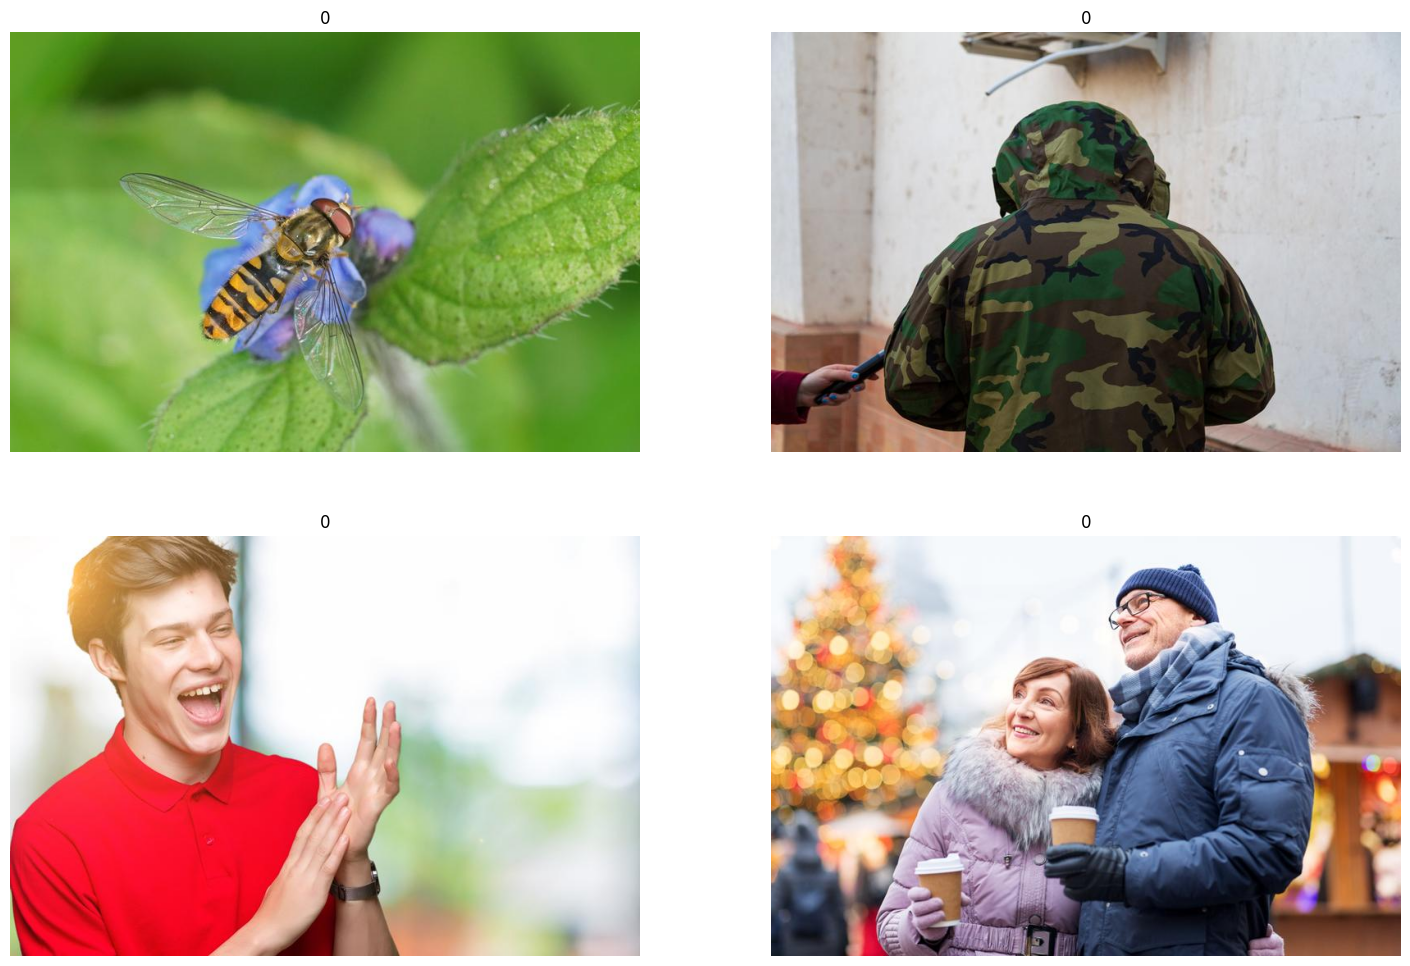

In [ ]:
# Display several random images from the dataset.
display_dataset_samples(image_paths)

# 4 Build Model

In [1]:
import tensorflow as tf
# Set the global policy to mixed_float16 to improve training speed
tf.keras.mixed_precision.set_global_policy('mixed_float16')
print(tf.__version__)
print(tf.keras.__version__)

2.17.1
3.5.0


In [ ]:
# Create directory for saved models
os.makedirs("/content/drive/ai-vs-human/saved_models", exist_ok=True)

In [ ]:
# Define constants
from dataclasses import dataclass
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 2
    IMG_HEIGHT:  int = 780
    IMG_WIDTH:   int = 780
    CHANNELS:    int = 3
    BATCH_SIZE:  int = 32
    DATA_ROOT:   str = '/content/drive/ai-vs-human/dataset'

@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE:     int   = 32
    EPOCHS:         int   = 50
    LEARNING_RATE:  float = 0.00001
    CHECKPOINT_DIR: str   = '/content/drive/ai-vs-human/saved_models.keras'



In [ ]:
import tensorflow as tf


input_shape = (DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH, DatasetConfig.CHANNELS)

print('Loading model with ImageNet weights...')
ResNet50_conv_base = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape,
                                                    include_top=False, # We will supply our own top.
                                                    weights='imagenet',
                                                   )
# Set the `trainable` attribute of base to False to keep pre-trained weights.
ResNet50_conv_base.trainable = False

print('All weights trainable, fine tuning...')

Loading model with ImageNet weights...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
All weights trainable, fine tuning...


In [ ]:
print(ResNet50_conv_base.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 780, 780, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 786, 786, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 390, 390, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 390, 390, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 390, 390, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 392, 392, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 195, 195, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 195, 195, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 195, 195, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 195, 195, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 195, 195, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 195, 195, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 195, 195, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 195, 195, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 195, 195, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout, Lambda, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomCrop, RandomZoom, Rescaling
from tensorflow.keras.models import Sequential

# Image input shape
INPUT_SHAPE = (DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH, DatasetConfig.CHANNELS)

# Data Augmentation
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomCrop(height=128, width=128),
    RandomZoom(0.1),

])

# CNN Model
model = Sequential([

  # Input Layer
  Input(shape=(INPUT_SHAPE)),

  # Data Augmentation
  data_augmentation,

  # ResNet Preprocessing (applied during training & inference)
  Lambda(preprocess_input),

  ResNet50(weights='imagenet', include_top=False, pooling='avg'),

  Flatten(),

  Dense(50, activation='relu'),
  Dropout(0.5),

  # The final `Dense` layer with the number of classes.
  Dense(1, activation ='sigmoid')

])

print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │         102,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,690,213 (90.37 MB)

 Trainable params: 23,637,093 (90.17 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

input_shape = (DatasetConfig.IMG_HEIGHT, DatasetConfig.IMG_WIDTH)
batch_size = DatasetConfig.BATCH_SIZE
train_path = DatasetConfig.DATA_ROOT + '/train'
valid_path = DatasetConfig.DATA_ROOT + '/valid'

train_dataset = image_dataset_from_directory(directory=train_path,
                                             image_size=input_shape,
                                             batch_size=batch_size,
                                             seed=SEED,
                                             label_mode='binary',
                                            )

valid_dataset = image_dataset_from_directory(directory=valid_path,
                                             image_size=input_shape,
                                             batch_size=batch_size,
                                             seed=SEED,
                                             label_mode='binary'
                                            )




Found 63960 files belonging to 2 classes.
Found 15990 files belonging to 2 classes.


In [ ]:
# Print the shape of the data and the aassociated labels.
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 780, 780, 3)
labels batch shape: (32, 1)


In [ ]:
valid_dataset.class_names

['0', '1']

['0', '1']


<ipython-input-57-86832dd8c229>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  truth_idx = int(labels_batch[i].numpy())


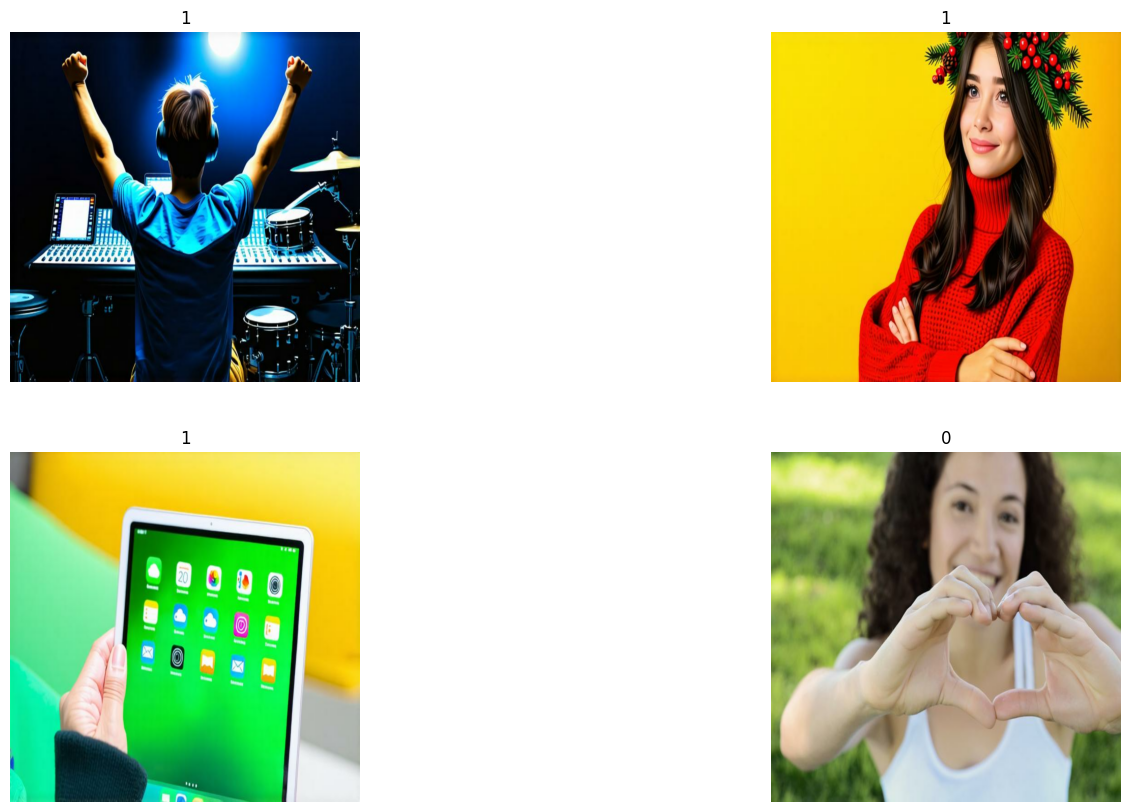

In [ ]:
import numpy as np
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(18, 10))

# Assumes dataset batch_size is at least 32.
num_rows = 2
num_cols = 2

# Here we use the take() method to retrieve just the first batch of data from the training portion of the dataset.
for data_batch, labels_batch in train_dataset.take(1):
    # For the batch of images and the associated (one-hot encoded) labels,
    # plot each of the images in the batch and the associated ground truth labels.
    for i in range(num_rows*num_cols):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        truth_idx = int(labels_batch[i].numpy())
        plt.title(class_names[truth_idx])
        plt.axis("off")

In [ ]:
# Compile the model.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=TrainingConfig.LEARNING_RATE),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# Create a model checkpoint callback to save the "best" model based on highest validation_accuracy.
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=TrainingConfig.CHECKPOINT_DIR,
                                                               save_weights_only=False,
                                                               monitor="val_accuracy",
                                                               mode="max",
                                                               save_best_only=True,
                                                              )
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

# Train the model.
training_results = model.fit(train_dataset,
                             epochs=TrainingConfig.EPOCHS,
                             validation_data=valid_dataset,
                             callbacks= [model_checkpoint_callback,
                                         early_stopping]
                            )

Epoch 1/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 308s 154ms/step - accuracy: 0.8050 - loss: 0.4209 - val_accuracy: 0.9716 - val_loss: 0.2312
Epoch 2/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 298s 149ms/step - accuracy: 0.8752 - loss: 0.2824 - val_accuracy: 0.9830 - val_loss: 0.1939
Epoch 3/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 297s 149ms/step - accuracy: 0.8985 - loss: 0.2420 - val_accuracy: 0.9859 - val_loss: 0.1407
Epoch 4/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 296s 148ms/step - accuracy: 0.9069 - loss: 0.2254 - val_accuracy: 0.9846 - val_loss: 0.1551
Epoch 5/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 297s 149ms/step - accuracy: 0.9098 - loss: 0.2187 - val_accuracy: 0.9883 - val_loss: 0.1153
Epoch 6/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 298s 149ms/step - accuracy: 0.9186 - loss: 0.1989 - val_accuracy: 0.9894 - val_loss: 0.1034
Epoch 7/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 295s 147ms/step - accuracy: 0.9227 - loss: 0.1901 - val_accuracy: 0.9830 - val_loss: 0.1078
Epoch 8/40
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 296s 148ms/step - ac

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show(block=True)
    plt.close()

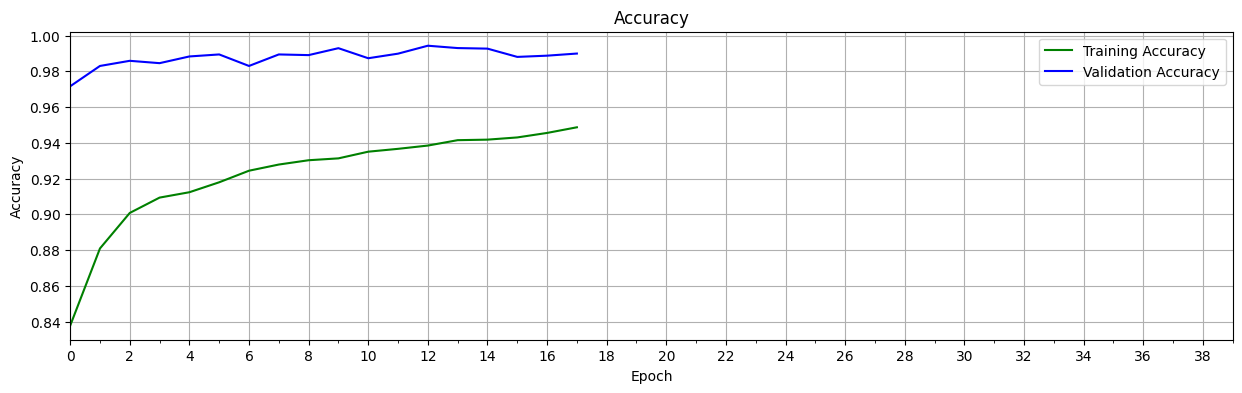

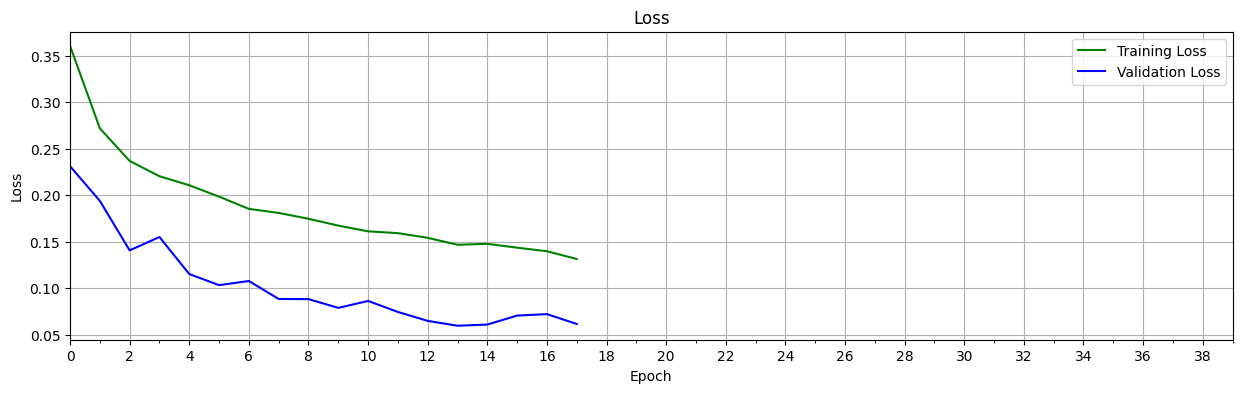

In [ ]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

In [ ]:
def evaluate_model(dataset, checkpoint_dir=None):

    if not checkpoint_dir:
        checkpoint_dir = os.path.join(os.getcwd(),TrainingConfig.CHECKPOINT_DIR)

    print(f"Checkpoint_dir: {checkpoint_dir}")

    # Load saved model.
    model = tf.keras.models.load_model(checkpoint_dir, custom_objects={'preprocess_input': preprocess_input})

    num_matches = 0
    plt.figure(figsize=(17, 12))
    num_rows = 5
    num_cols = 6
    class_names = dataset.class_names

    # Retrieve a single batch.
    for data_batch, labels_batch in dataset.take(1):

        predictions = model.predict(data_batch)

        for idx in range(num_rows*num_cols):
            ax = plt.subplot(num_rows, num_cols, idx + 1)
            plt.axis("off")
            plt.imshow(data_batch[idx].numpy().astype("uint8"))

            if predictions[idx] > 0.5:
                pred_idx = 1
            else:
                pred_idx = 0

            truth_idx = int(labels_batch[idx].numpy())

            title = str("Truth: " + class_names[truth_idx]) + " vs Pred:  " + str(class_names[pred_idx])
            title_obj = plt.title(title, fontdict={'fontsize':11})

            if pred_idx == truth_idx:
                num_matches += 1
                plt.setp(title_obj, color='g')
            else:
                plt.setp(title_obj, color='r')

            acc = num_matches/(idx+1)
        print("Prediction accuracy: ", int(100*acc)/100)

Checkpoint_dir: /content/drive/ai-vs-human/saved_models.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<ipython-input-66-ab1e0eb66904>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  truth_idx = int(labels_batch[idx].numpy())


Prediction accuracy:  1.0


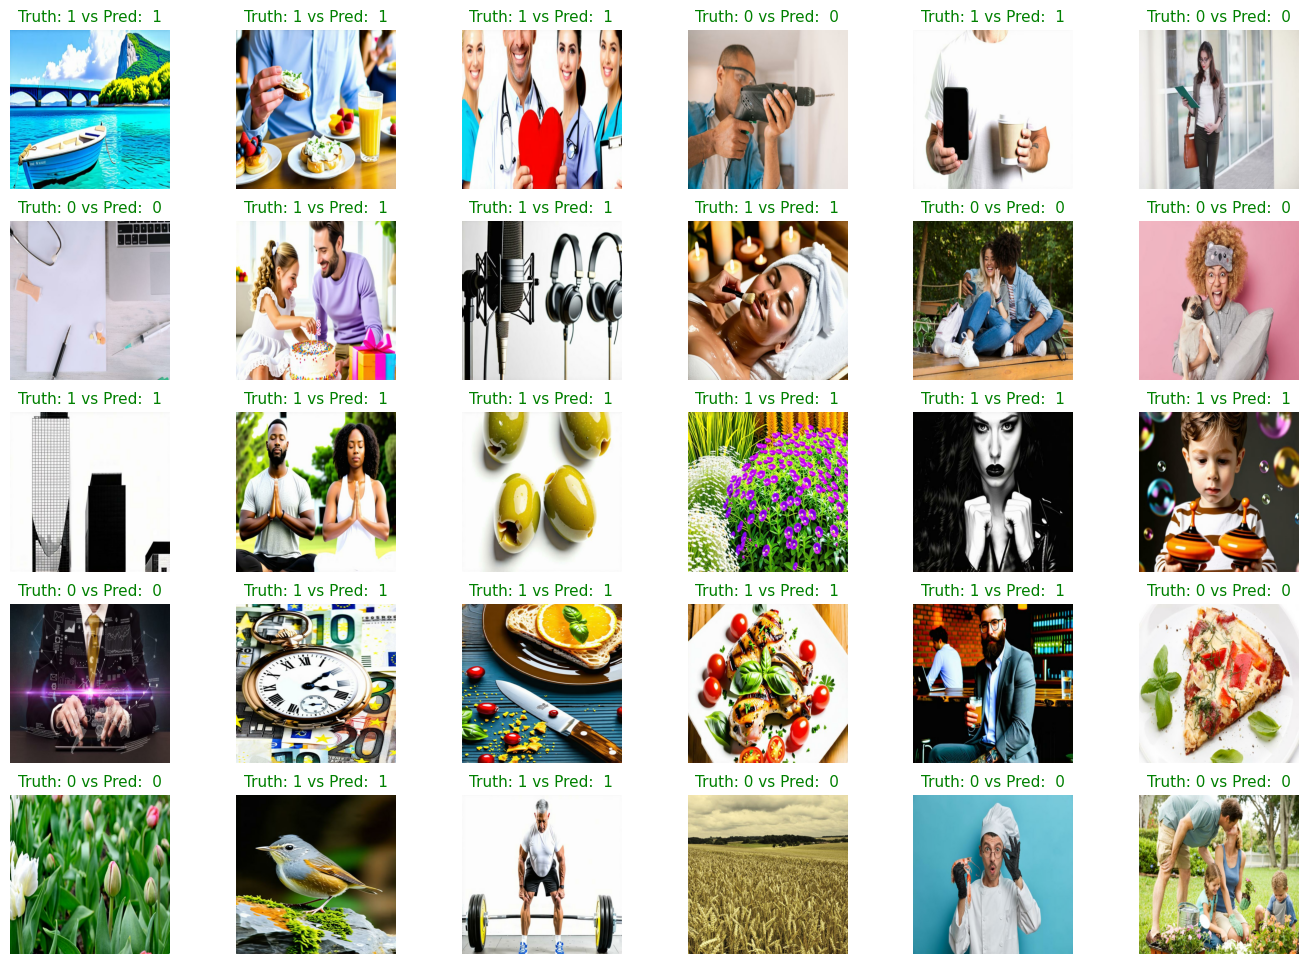

In [ ]:
evaluate_model(valid_dataset, TrainingConfig.CHECKPOINT_DIR)


# F1 Score (on Validation Set)


In [ ]:
val_dir = '/content/drive/ai-vs-human/dataset/valid'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(680, 680),  # Resize to match input size
    batch_size=32,
    label_mode='binary'
)

Found 15990 files belonging to 2 classes.


In [ ]:
from sklearn.metrics import f1_score

# Predict on the validation data
y_true = []
y_pred = []

checkpoint_dir = os.path.join(os.getcwd(),TrainingConfig.CHECKPOINT_DIR)
model = tf.keras.models.load_model(checkpoint_dir, custom_objects={'preprocess_input': preprocess_input})

for images, labels in val_ds:
    predictions = model.predict(images)  # Model's predictions
    y_true.extend(labels.numpy())        # True labels
    y_pred.extend((predictions >= 0.5).astype(int))  # Predicted labels (binary)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

# Evaluate Test Set

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

dataset_path = '/content/drive'
test_path = '/content/drive/test_data_v2'
input_csv = '/content/drive/test.csv'
checkpoint_dir = '/content/drive/ai-vs-human/saved_models.keras'

# Load your CSV file with image paths
df = pd.read_csv(input_csv, skiprows=1, header=None, names=['id'])

# Load the model
model = tf.keras.models.load_model(checkpoint_dir,custom_objects={'preprocess_input': preprocess_input})

# Initialize an empty list to store the predictions
predictions = []

# Set up a batch size
batch_size = 64  # Adjust based on available memory

# Initialize a list to store images for batch prediction
batch_images = []
batch_img_paths = []

# Loop through each image path
for idx, img_path in enumerate(df['id']):
    img = image.load_img(os.path.join(dataset_path, img_path), target_size=(680, 680))
    img_array = img_to_array(img)
    batch_images.append(img_array)
    batch_img_paths.append(img_path)

    # Process in batches
    if len(batch_images) == batch_size or idx == len(df) - 1:
        batch_images = np.array(batch_images)

        # Get batch predictions
        batch_preds = model.predict(batch_images)

        for i, pred in enumerate(batch_preds):
            label = 1 if pred >= 0.5 else 0
            predictions.append([batch_img_paths[i], label])

        # Reset for next batch
        batch_images = []
        batch_img_paths = []

    if idx % 1000 == 0:
        print(f"Processed {idx}/{len(df)} images")


In [ ]:
# Save or use your predictions as needed
# For example, saving predictions to a CSV:
predictions_df = pd.DataFrame(predictions, columns=['id', 'label'])
predictions_df.to_csv('/content/drive/predictions.csv', index=False)

In [ ]:
id = []
label = []
for item in predictions:
  id.append(item[0])
  label.append(item[1])

In [ ]:
results = pd.DataFrame({
    'id': id,
    'label': label
})

results[:30]

id  label
0   test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg      1
1   test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg      0
2   test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg      0
3   test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg      0
4   test_data_v2/a16495c578b7494683805484ca27cf9f.jpg      0
5   test_data_v2/d08826f7ccab45c8935d8df5524b2869.jpg      0
6   test_data_v2/8ba52123cc7b4e3aa90e3947734197e0.jpg      0
7   test_data_v2/b107ac0040284f1aace7a6714bf152f7.jpg      0
8   test_data_v2/601c646d626d46da8c5fac6653efcfb8.jpg      1
9   test_data_v2/ef29ead63754441b82b56c1a22082fdf.jpg      1
10  test_data_v2/f166b995659946e7bcaa25823890d909.jpg      1
11  test_data_v2/bc1fe6d5527246eca53bbfec751d4020.jpg      0
12  test_data_v2/72db1bbd6a0d46a8b72b240cacfb1794.jpg      0
13  test_data_v2/8bb829efccb549178cae75a2c6b7780f.jpg      0
14  test_data_v2/eb476c70a9ce427d810a265c492888d4.jpg      0
15  test_data_v2/ae9f3fd741dd45f0ae94fce7d0b3ab6b.jpg      0
16  test_data_v2/a42e0b2c275242feaf8618d0c74fc419.jpg      1
17  test_data_v2/524eaa42b4324cc2a66baec78e8e6984.jpg      0
18  test_data_v2/57e48cca910d41d4886ffb48ec992d95.jpg      0
19  test_data_v2/f79a9aa7d7a1499ca22a1b5c1ee7ec69.jpg      0
20  test_data_v2/d153421ac9364f59918fb6b0a481892f.jpg      0
21  test_data_v2/3b793f97cbd24f6ab34b320ffdff8553.jpg      0
22  test_data_v2/ed65b1d1ca1f40a6b96a2d317a350a76.jpg      0
23  test_data_v2/f3677cbf96aa4759a224a281b7e2bae4.jpg      0
24  test_data_v2/b7f7a867362444c5b64293dd0c46e3ed.jpg      0
25  test_data_v2/083f811782e04ff783de076773b876de.jpg      1
26  test_data_v2/d49743c76c1b4666bbca2f34834816d6.jpg      1
27  test_data_v2/e7dc5cf3c30e4420b811a30a1b8545c1.jpg      0
28  test_data_v2/48446813ae8c428e9c5920dfaea63be4.jpg      0
29  test_data_v2/ac6c419aae844f1db13a3307c9a5d597.jpg      1

In [ ]:
# Save results to CSV
csv_filename = "predictions_training.csv"
results.to_csv(csv_filename, index=False)

print(f"CSV file saved: {csv_filename}")


CSV file saved: predictions_training.csv


In [ ]:
from google.colab import files
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>